In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class polynomial:
    
    def __init__(self, coef):
        self.coef = coef
        self.degree = len(coef)-1
        
    def show(self):
        text = f"P(x)={self.coef[0]}"
        for i in range(1, self.degree+1):
            text = text + f"+{self.coef[i]}*x^{i}"
        print(text)
        
    def eval(self, x):
        return sum(self.coef[i]*x**i for i in range(self.degree+1))
    
    def plot(self, xlim, n = 1000, points = None, named_labels=True):
        x = np.linspace(xlim[0], xlim[1], n)
        plt.plot(x, self.eval(x))
        if points:
            plt.scatter(points[0], points[1], c = "red")
        if named_labels:
            plt.xlabel("x")
            plt.ylabel("f(x)")

In [3]:
def interpolation(x, y):
    n = len(x)
    coef = np.empty(n)
    A = np.array([[x[j]**i for i in range(n)] for j in range(n)])
    print(A.shape)
    coef = np.linalg.solve(A, y)
    return polynomial(coef)

(4, 4)
P(x)=-1.0+0.0*x^1+-0.0*x^2+1.0*x^3


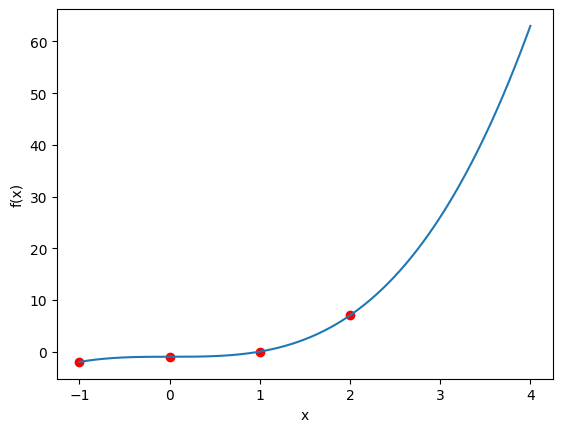

In [4]:
x = np.array([-1, 0, 1, 2])
y = np.array([-2, -1, 0, 7])
result = interpolation(x, y)
result.show()
points = x, y
result.plot([-1, 4], points = points)

(11, 11)
P(x)=1.0000000000000053+-4.443335855776198e-14*x^1+-16.855203619909986*x^2+1.1009711660866135e-12*x^3+123.35972850679272*x^4+-6.960922138522803e-12*x^5+-381.4338235294363*x^6+1.2793585635328905e-11*x^7+494.9095022624834*x^8+-6.889201304334954e-12*x^9+-220.94174208146825*x^10


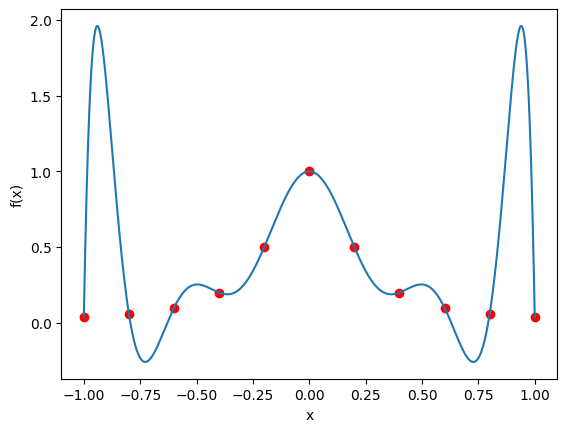

In [5]:
x = np.linspace(-1, 1, 11)
y = 1/(1+25*x**2)
result = interpolation(x, y)
result.show()
points = x, y
result.plot([-1, 1], points = points)

[-9.89821442e-01 -9.09631995e-01 -7.55749574e-01 -5.40640817e-01
 -2.81732557e-01  6.12323400e-17  2.81732557e-01  5.40640817e-01
  7.55749574e-01  9.09631995e-01  9.89821442e-01]
(11, 11)
P(x)=1.0000000000000049+8.543506666330865e-15*x^1+-12.476511524283207*x^2+-5.305187297600974e-13*x^3+61.44301859274378*x^4+1.8978395466605407e-12*x^5+-133.44475553833115*x^6+-2.2404016856274786e-12*x^7+130.1058386748468*x^8+8.644324622075815e-13*x^9+-46.63291708775848*x^10


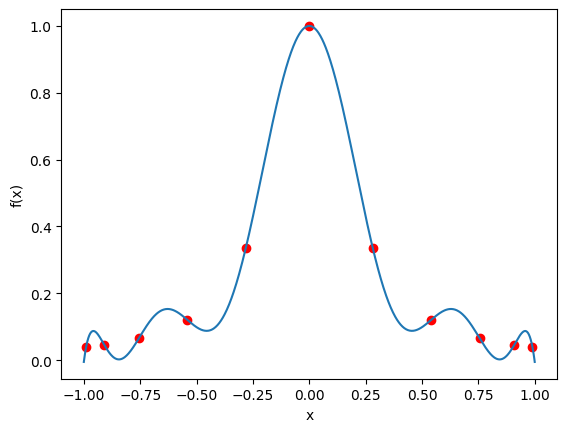

In [6]:
n = 11
x = np.array(np.sort([np.cos((2*i+1)/(2*n)*np.pi) for i in range(n)]))
print(x)
y = 1/(1+25*x**2)
result = interpolation(x, y)
result.show()
points = x, y
result.plot([-1, 1], points = points)
plt.show()

In [7]:
def splain_interpolation(x, y, verbose = False):
    n = len(x)
    if verbose:
        print(f"n={n}, expected number of equations = {4*n-4}")
    splains = {}
    A = np.zeros((4*n-4, n-1, 4))
    b = np.zeros(4*n-4)
    
    if verbose:
            print(f"0-th condition for 0-th splain's coefficients:")
            print(f"{np.array([0, 0, 2, 6*x[0]])}*[p_0, p_1, p_2, p_3]=0")
    A[0, 0, :]   = np.array([0, 0, 2, 6*x[0]])

    if verbose:
            print(f"1-th condition for {n-2}-th splain's coefficients:")
            print(f"{np.array([0, 0, 2, 6*x[n-1]])}*[p_0, p_1, p_2, p_3]=0")
    A[1, n-2, :] = np.array([0, 0, 2, 6*x[n-1]])
    if verbose:
            print(f"Code successfully entered into the main loop.")
        
    for i in range(n-1):
        if verbose:
            print(f"{2+i}-th condition for {i}-th splain's coefficients:")
            print(f"{np.array([x[i]**j for j in range(4)])}*[p_0, p_1, p_2, p_3]={y[i]}")
        A[2+i, i, :] = np.array([x[i]**j for j in range(4)])
        b[2+i] = y[i]
    for i in range(n-1):
        if verbose:
            print(f"{i+n+1}-th condition for {i}-th splain's coefficients:")
            print(f"{np.array([x[i+1]**j for j in range(4)])}*[p_0, p_1, p_2, p_3]={y[i+1]}")
        A[i+n+1, i, :] = np.array([x[i+1]**j for j in range(4)])
        b[i+n+1] = y[i+1]

    for i in range(n-2):
        if verbose:
            print(f"{i+2*n}-th condition for coefficients of {i}-th  and {i+1}-th splains (named p and q):")
            print(f"{np.array([0, 1, 2*x[i+1], 3*x[i+1]**2])}*[p_0, p_1, p_2, p_3]+{np.array([0, -1, -2*x[i+1], -3*x[i+1]**2])}*[q_0, q_1, q_2, q_3]=0")
        A[i+2*n, i, :] = np.array([0, 1, 2*x[i+1], 3*x[i+1]**2])
        A[i+2*n, i+1, :] = np.array([0, -1, -2*x[i+1], -3*x[i+1]**2])
        
    for i in range(n-2):
        if verbose:
            print(f"{i+3*n-2}-th condition for coefficients of {i}-th  and {i+1}-th splains (named p and q):")
            print(f"{np.array([0, 0, 2, 6*x[i+1]])}*[p_0, p_1, p_2, p_3]+{np.array([0, 0, -2, -6*x[i+1]])}*[q_0, q_1, q_2, q_3]=0")
        A[i+3*n-2, i, :] = np.array([0, 0, 2, 6*x[i+1]])
        A[i+3*n-2, i+1, :] = np.array([0, 0, -2, -6*x[i+1]])

    A_matrix = A.reshape((A.shape[0], -1))
    if verbose:
            print(f"Reshaped tensor A into matrix:\n{A_matrix}")
    coef_list = np.linalg.solve(A_matrix, b)
    if verbose:
            print(f"Found list of coefficients:\n{coef_list}")
    for i in range(n-1):
        splains[(x[i], x[i+1])] = polynomial(coef_list[4*i:4*i+4])
    return splains

In [11]:
def plot_splains(splains, n = 1000, points = None):
    splains_number = len(splains)
    for x_range, polynomial in splains.items():
        polynomial.plot(x_range, n = int(n/splains_number), points = points, named_labels = False)
    
    if points:
        plt.scatter(points[0], points[1], c="red")
    
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.show()

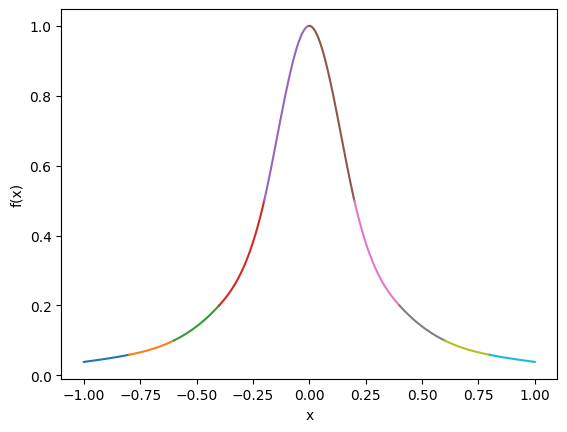

In [14]:
x = np.linspace(-1, 1, 11)
y = 1/(1+25*x**2)
#x, y = ([1, 2, 3], [1, 2, 3])
result = splain_interpolation(x, y, verbose=False)
points = x, y
plot_splains(result)

p_i(x_i)=y_i
p_i(x_{i+1})=y_{i+1}
p_0'(x_0)=0
p_{n-1}'(x_n)=0
p_i'(x_{i+1})=p_{i+1}'(x_{i+1})
p_i"(x_{i+1})=p_{i+1}"(x_{i+1})